In [1]:
import sys
sys.path.append("../src")

from Utils import *

### Future work:
- Construct the network for a single subreddit
- Analyze the propagation of "polarity"

In [2]:
with open('../snaps/reddit.json', 'r') as f:
    data = json.load(f)
    nxg = json_graph.node_link_graph(data, directed=True)

In [3]:
ps = [0.01, 0.05, 0.1]
propagators = ["random 0.3", "w", "jac", "bgr"]
T = 30

In [4]:
results = biased_assimilation_analysis(nxg, ps, propagators, T)

with open("../results", "wb") as f:
    pickle.dump(results, f)

P: 0.01
----------------------------------------
Propagating with: random 0.3
Propagating with: w
Propagating with: jac
Propagating with: bgr
P: 0.05
----------------------------------------
Propagating with: random 0.3
Propagating with: w
Propagating with: jac
Propagating with: bgr
P: 0.1
----------------------------------------
Propagating with: random 0.3
Propagating with: w
Propagating with: jac
Propagating with: bgr


In [5]:
def plot_results(results):
    for p, propagators in results.items():
        for propagator, metrics in propagators.items():
            fig, ax = plt.subplots(figsize=(12, 7))
            ax.set_title("Propagating with {0}, $p={1}$".format(propagator, p))
            legend = list()
            for m, vals in metrics.items():
                vals = vals[:50]
                if m.lower() == "gdi":
                    ax2 = ax.twinx()
                    ax2.plot(range(len(vals)), vals, 'r')
                    ax2.set_ylabel(m)
                    ax2.legend(["GDI"], loc=5)
                else:
                    ax.plot(range(len(vals)), vals)
                    legend.append(m.split()[-1])
            ax.set_xlabel("t")
            ax.set_ylabel("NDI")
            ax.legend(legend)

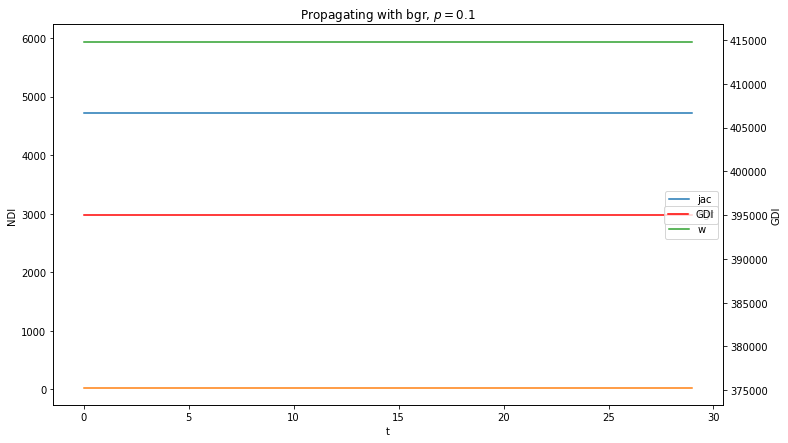

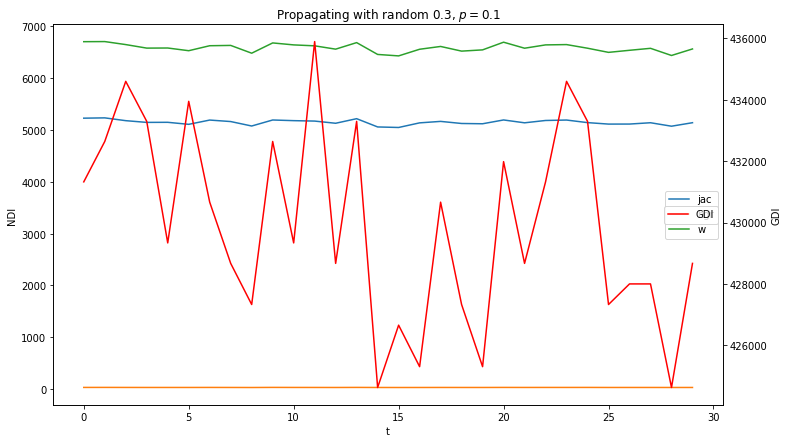

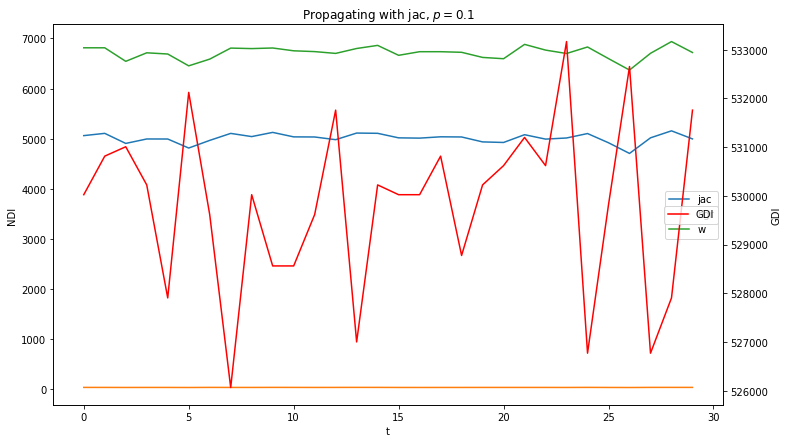

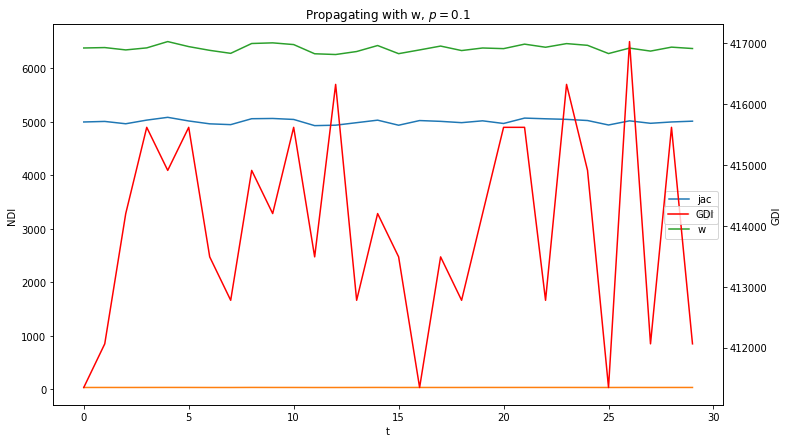

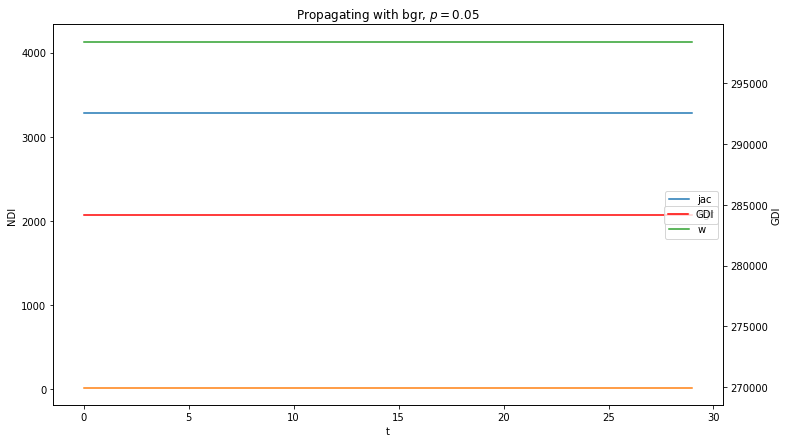

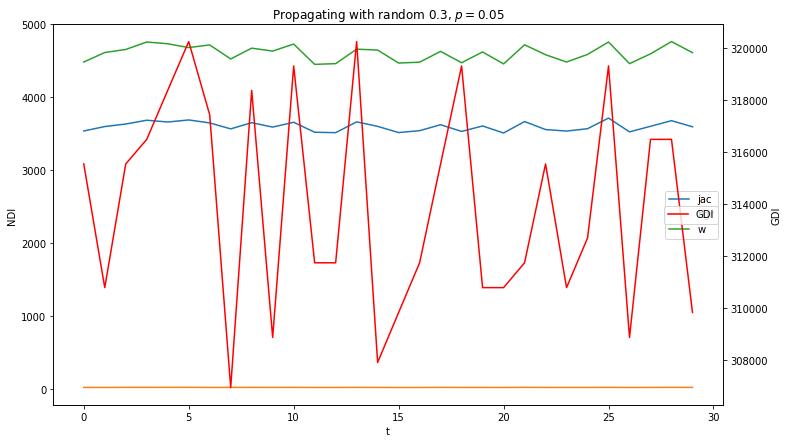

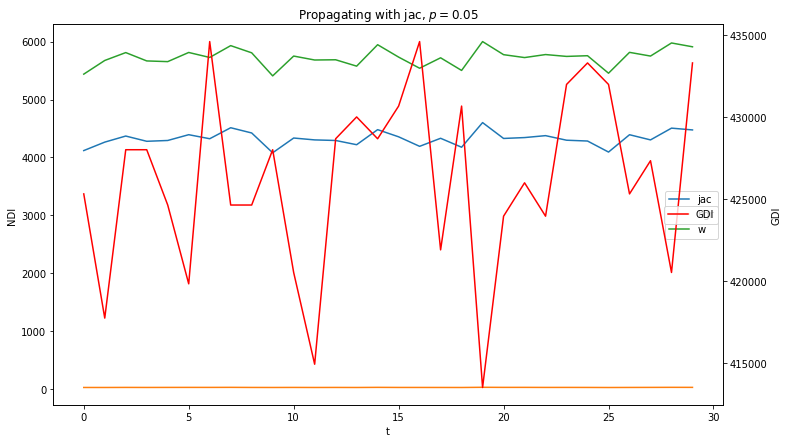

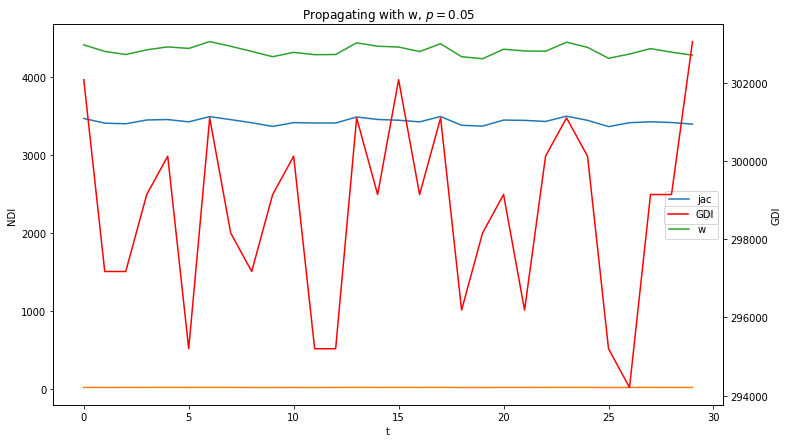

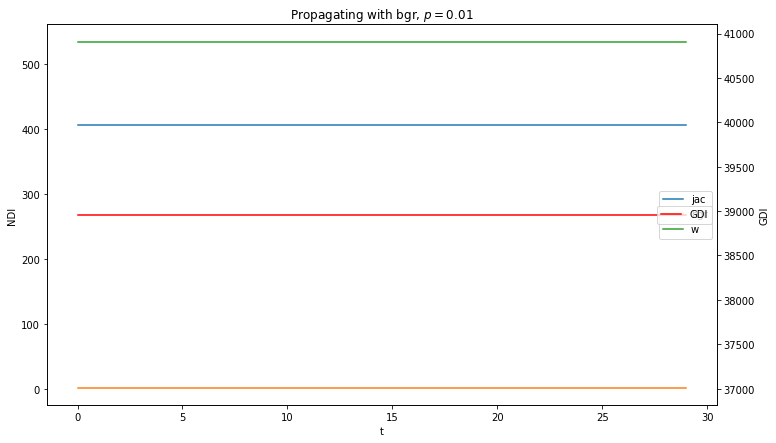

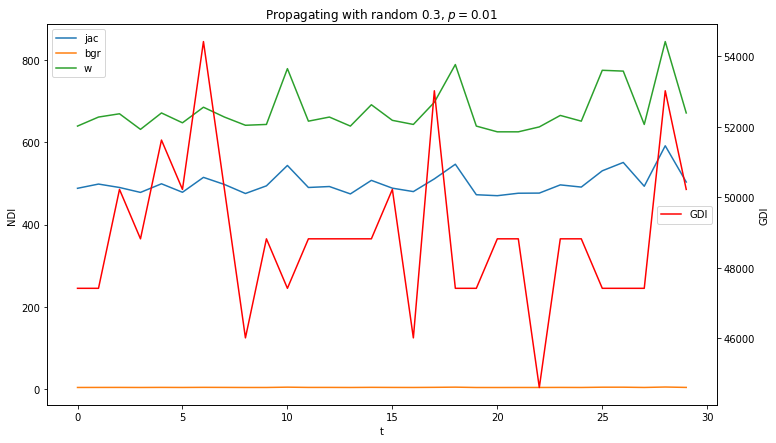

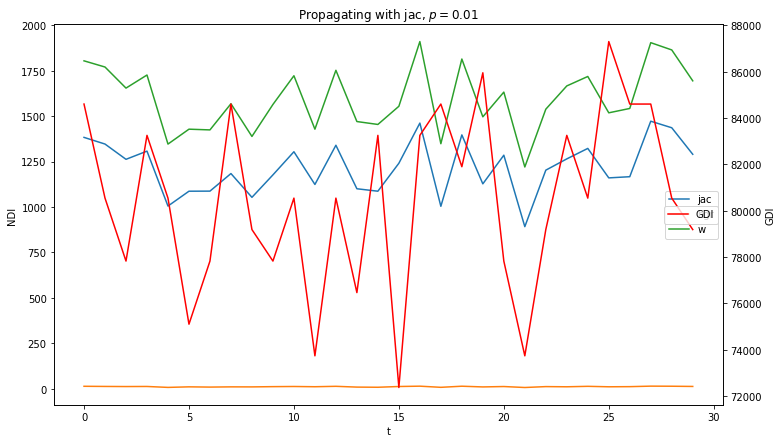

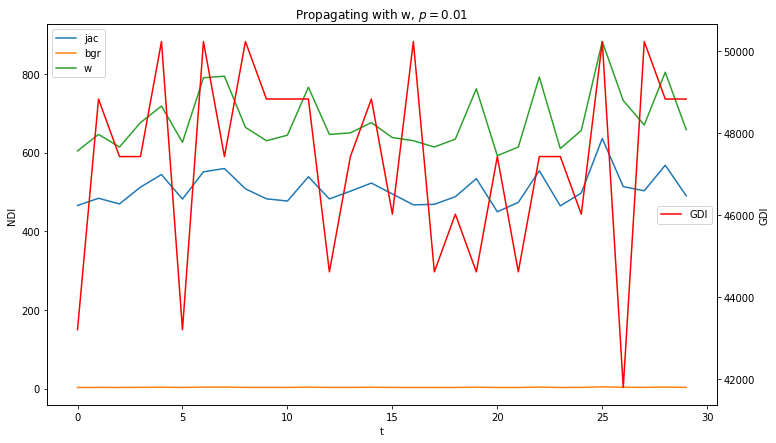

In [6]:
plot_results(results)